In [11]:
import os
import glob
import lsst.eotest.image_utils as imutils
import lsst.eotest.sensor as sensorTest
import matplotlib.pyplot as plt
import numpy as np
import yaml
import sys
sys.path.insert(0, '../')
import ccob_utils as u
import ccob_beam as b
import pickle
%load_ext autoreload
%autoreload 2 
%matplotlib inline
import scipy.ndimage as sc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
eotest_results_path = '/gpfs/slac/lsst/fs1/g/data/jobHarness/jh_archive-test/LCA-11021_RTM/LCA-11021_RTM-006-Dev/5867D/collect_raft_results/v0/38904'
tmp_dir = '/home/combet/tmp_new'

In [13]:
slot_names = ['00','01','02','10','11','12','20','21','22']
band_names = ['nm850','nm750','red','blue']
slac_freq_names = ['0850','0750','0620','0450']
path_ccob_flat = '/home/combet/tmp_new'
path_slac_flat_root = '/gpfs/slac/lsst/fs1/g/data/jobHarness/jh_archive-test/LCA-11021_RTM/LCA-11021_RTM-006-Dev/5867D/qe_raft_acq/v0/38892/'


In [14]:
for slot in slot_names:
    for i,band in enumerate(band_names):
        path_slac_flat = os.path.join(path_slac_flat_root,'S'+slot)
        slac_flat = glob.glob(os.path.join(path_slac_flat,'*lambda_flat_'+slac_freq_names[i]+'*'))[0]
        ccd_slac_flat = sensorTest.MaskedCCD(slac_flat)

        eotest_results_file = os.path.join(eotest_results_path, '{}_eotest_results.fits'.format(ccd_slac_flat.md('LSST_NUM')))
        gains = u.gains(eotest_results_file)
        image = {}
        for amp in ccd_slac_flat:
            image[amp] = ccd_slac_flat.bias_subtracted_image(amp)
            image[amp] *= gains[amp]
#        outfile = os.path.join(tmp_dir,slac_freq_names[0]+'_slac_flat.fits')
        outfile = os.path.join(tmp_dir,'tmp.fits')
        imutils.writeFits({amp: image[amp].getImage() for amp in ccd_slac_flat}, outfile, slac_flat)

        ccob_flat = os.path.join(path_ccob_flat, 'QE_S'+slot+'_'+band+'_amp13_refx1000_refy256.fits')
        ccd_ccob_flat = sensorTest.MaskedCCD(ccob_flat)
        ccd_slac_flat = sensorTest.MaskedCCD(os.path.join(tmp_dir,'tmp.fits'))
        
        ref_slac = np.median(ccd_slac_flat[1].getImage().getArray())
        ref_ccob = np.median(ccd_ccob_flat[1].getImage().getArray())
        res_slac = np.zeros(len(ccd_slac_flat))
        res_ccob = np.zeros(len(ccd_slac_flat))
#         for i,amp in enumerate(ccd_slac_flat):
#             res_slac[i] = np.median(ccd_slac_flat[amp].getImage().getArray())/ref_slac
#             res_ccob[i] = np.median(ccd_ccob_flat[amp].getImage().getArray())/ref_ccob

#         xmin = np.min([res_slac, res_ccob])*0.999
#         xmax = np.max([res_slac, res_ccob])*1.001
#         ymin = np.min([res_slac, res_ccob])*0.999
#         ymax = np.max([res_slac, res_ccob])*1.001

#         plt.scatter(res_slac, res_ccob)
#         plt.plot([xmin, xmax],[ymin, ymax], color='red')
#         plt.xlim([xmin, xmax])
#         plt.ylim([ymin,ymax])
#         plt.xlabel("SLAC flat")
#         plt.ylabel("CCOB flat")
#         plt.title('S'+slot+', '+band)
#         plt.savefig(os.path.join(tmp_dir,'ccob_vs_slac_S'+slot+'_'+band+'.png'))
#         plt.close()

        
        slac_flat_image, dumm_slac = u.make_ccd_2d_array(slac_flat, gains=gains)
        ccob_flat_image, dumm_ccob = u.make_ccd_2d_array(ccob_flat)
        slac_qe = slac_flat_image/ref_slac
        ccob_qe = ccob_flat_image/ref_ccob
        res = sc.uniform_filter(np.abs(slac_qe-ccob_qe)*100/(slac_qe), 10)
        vmin = 0.#np.mean(res) - 0.5*np.std(res)
        vmax = 1.#np.mean(res) + 0.5*np.std(res)
        plt.imshow(res, vmin=vmin, vmax=vmax)
        plt.title('S'+slot+', '+band)
        plt.colorbar()
        plt.savefig(os.path.join(tmp_dir,'ccob_vs_slac_S'+slot+'_'+band+'_rel_diff.png'))
        plt.close()


14156.0
14232.0
14221.0
14149.0
14137.0
14073.0
14056.0
13985.0
14293.0
14244.0
14287.0
14344.0
14364.0
14373.0
14424.0
14297.0
14198.0
14252.0
14239.0
14176.0
14179.0
14132.0
14132.0
14077.0
14290.0
14227.0
14256.0
14303.0
14316.0
14325.0
14388.0
14289.0
14162.0
14166.0
14141.0
14088.0
14112.0
14092.0
14117.0
14083.0
14087.0
14011.0
14029.0
14064.0
14071.0
14086.0
14174.0
14130.0
13941.0
13963.0
13955.0
13916.0
13950.0
13943.0
13977.0
13950.0
13996.0
13915.0
13924.0
13947.0
13944.0
13948.0
14025.0
13969.0
13964.0
13979.0
13946.0
13959.0
13963.0
13951.0
13979.0
13995.0
14328.0
14313.0
14234.0
14279.0
14274.0
14218.0
14247.0
14235.0
14065.0
14088.0
14058.0
14073.0
14074.0
14054.0
14072.0
14077.0
14304.0
14299.0
14228.0
14275.0
14271.0
14217.0
14247.0
14233.0
14088.0
14124.0
14104.0
14118.0
14115.0
14086.0
14090.0
14082.0
14097.0
14103.0
14040.0
14090.0
14089.0
14035.0
14058.0
14036.0
13945.0
13992.0
13978.0
13998.0
14000.0
13975.0
13983.0
13978.0
14026.0
14029.0
13962.0
14008.0
14002.0


In [29]:
slot='02'
band='nm850'
ccob_obj = pickle.load(open(os.path.join(path_ccob_flat, 
                                                 band+'_beam_slot'+slot+'_amp13_refx1000_refy256.pkl'),
                                    'rb'))
        

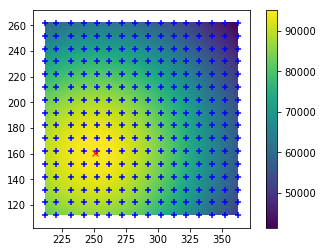

In [30]:
ccob_obj.plot()